In [1]:
def overlap(a,b, min_length = 1):
    start = 0
    while True:
        start = a.find(b[:min_length], start)
        if(start == -1):
            return 0
        if b.startswith(a[start:]):
            return len(a) - start
        start += 1

In [86]:
from itertools import permutations
from graphviz import Digraph

def get_merged_node_maximal_overlap(reads, step):
    dot = Digraph(format="pdf")
    
    graph = []
    for _ in reads:
        graph.append([])

    for i,a in enumerate(reads):
        for b in reads:
            graph[i].append(overlap(a,b))        
    
    for i,read in enumerate(reads):
        dot.node(read, read)
    for i,a in enumerate(reads):
        for j,b in enumerate(reads):
            if(i is not j and graph[i][j] is not 0):
                dot.edge(a,b, label=str(graph[i][j]))
                
    dot.render('overlap-output/step-' + str(step), cleanup=True)                  

    read_a = None; read_b = None;
    overlap_len = 0
    for a,b in permutations(reads, 2):
        o_len = overlap(a,b)
        if(o_len > overlap_len):
            overlap_len = o_len
            read_a, read_b = a,b
    return read_a, read_b, overlap_len

In [87]:
def overlap_reads(reads):
    reads = sorted(reads)
    step = 1
    reada, readb , overlap = get_merged_node_maximal_overlap(reads, step)
    while overlap > 0:
        reads.remove(reada)
        reads.remove(readb)        
        reads.append((reada + readb[overlap:]))
        step += 1
        reada, readb , overlap = get_merged_node_maximal_overlap(reads,step)
    return ''.join(reads)

In [88]:
overlap_reads(["abcd","bcda","bcd"])

'abcda'

In [183]:
def overlap(a,b, min_length = 1):
    start = 0
    while True:
        start = a.find(b[:min_length], start)
        if(start == -1):
            return 0
        if b.startswith(a[start:]):
            return len(a) - start
        start += 1

In [2]:
def get_kmers(reads,k):
    kmers = set()
    edges = []
    for read in reads:
        for i in range(len(read) - k + 1):
            edges.append((read[i:i+k-1],read[i+1:i+k]))
            kmers.add(read[i:i+k-1])
            kmers.add(read[i+1:i+k])
    return kmers, edges

In [46]:
from graphviz import Digraph

def get_debruijn_graph(reads,k):
    kmers, edges = get_kmers(reads,k)
    dot = Digraph(format="pdf")
    l_kmers = list(kmers)

    for i,read in enumerate(l_kmers):
        dot.node(read, read)
    
    for (a,b) in edges:
                dot.edge(a,b)
    return dot,l_kmers, edges
#     dot.render('overlap-output/step-' + str(step), cleanup=True) 

In [47]:
dot,kmers, edges =  get_debruijn_graph(["a_long_long_long", "ng_long_l", "g_long_time"],8)

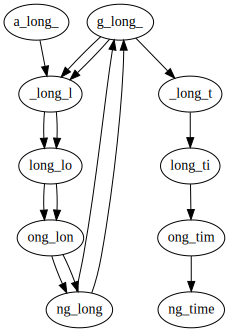

In [27]:
dot

In [29]:
kmers, edges

({'_long_l',
  '_long_t',
  'a_long_',
  'g_long_',
  'long_lo',
  'long_ti',
  'ng_long',
  'ng_time',
  'ong_lon',
  'ong_tim'},
 [('a_long_', '_long_l'),
  ('_long_l', 'long_lo'),
  ('long_lo', 'ong_lon'),
  ('ong_lon', 'ng_long'),
  ('ng_long', 'g_long_'),
  ('g_long_', '_long_l'),
  ('_long_l', 'long_lo'),
  ('long_lo', 'ong_lon'),
  ('ong_lon', 'ng_long'),
  ('ng_long', 'g_long_'),
  ('g_long_', '_long_l'),
  ('g_long_', '_long_t'),
  ('_long_t', 'long_ti'),
  ('long_ti', 'ong_tim'),
  ('ong_tim', 'ng_time')])

In [196]:
graphf = []
graphb = []
for _ in kmers:
    graphf.append([])
    graphb.append([])
    
for i,a in enumerate(kmers):
    for b in kmers:
        graphf[i].append(0)    
        graphb[i].append(0)            
        
for (a,b) in edges:
    a_i = kmers.index(a)
    b_i = kmers.index(b)
    graphf[a_i][b_i] += 1
    graphb[b_i][a_i] += 1
    
starti = -1    
for i in range(len(kmers)):
    flag = 0
    for j in range(len(kmers)):
        if(graphb[i][j] > 0):
            flag = 1
    if(flag == 0):
        starti = i
        break
        
print("Starting walk from node: " + kmers[starti])

Starting walk from node: a_long_


In [197]:
joinmers = []
flag = 1
now = starti
while flag:
    flag=0
    joinmers.append(kmers[now])
    for j in range(len(kmers)):
        if(graphf[now][j] > 0):
            graphf[now][j] -= 1
            flag = 1
            now = j
            break

In [198]:
out = []
out.append(joinmers[0])
for i in range(1,len(joinmers)):
    olen = overlap(joinmers[i-1],joinmers[i])
    out.append(joinmers[i][olen:])

In [199]:
''.join(out)

'a_long_long_long_l'